# Modeling 
In this part we will be exploring different models in order to classify songs according to their features.

In [72]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.precision', 2)

## Loading data

In [74]:
df = pd.read_csv('standardized_data.csv')
df = shuffle(df)

df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
9264,-1.04,0.96,1.53,0.51,-1.10,0.33,-0.64,-0.84,0.64,-0.16,0.35,-0.39,Emo
30146,-2.42,1.15,0.71,0.56,0.91,0.60,-0.46,1.38,-0.66,0.14,1.18,1.35,dnb
19473,0.54,0.29,-1.47,-0.49,0.91,-0.43,-0.66,1.46,-0.74,-0.75,-0.82,1.28,techno
12022,0.76,-1.46,-1.47,-1.01,0.91,-0.86,2.98,-0.82,-0.86,0.28,-0.66,-0.05,RnB
26309,-0.23,0.23,-0.92,-0.10,0.91,-0.72,-0.65,-0.76,0.89,-1.29,-0.30,-1.15,trap


In [75]:
X = df[['danceability', 'energy', 'loudness', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms']].to_numpy()
y = df[['genre']].to_numpy().ravel()

models_performance = []


Splitting data into training (80%) testing (20%), cross validation will be used in the training.

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26225, 12) (26225,)
(6557, 12) (6557,)


# Model training

## Logistic Regression

Tuning hyperparameters...
Training accuracy: 0.61
Test Accuracy: 0.61


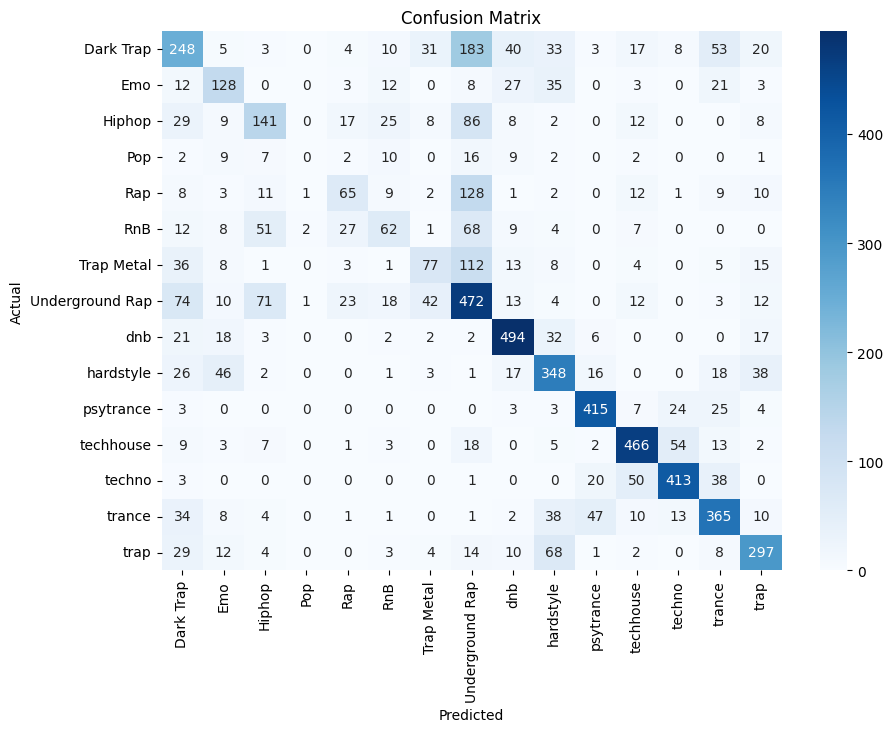

In [82]:
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier = LogisticRegression(max_iter=1000)

hyper_params_grid = dict({"C": [0.01, 0.1, 1, 10, 100]})
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(
    logistic_regression_classifier,
    hyper_params_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)


grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Training accuracy: {best_model.score(X_train, y_train):.2f}" )

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [83]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "LogisticRegression",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## Decision Tree Classifier

Tuning hyperparameters...
Training accuracy: 0.59
Test Accuracy: 0.58


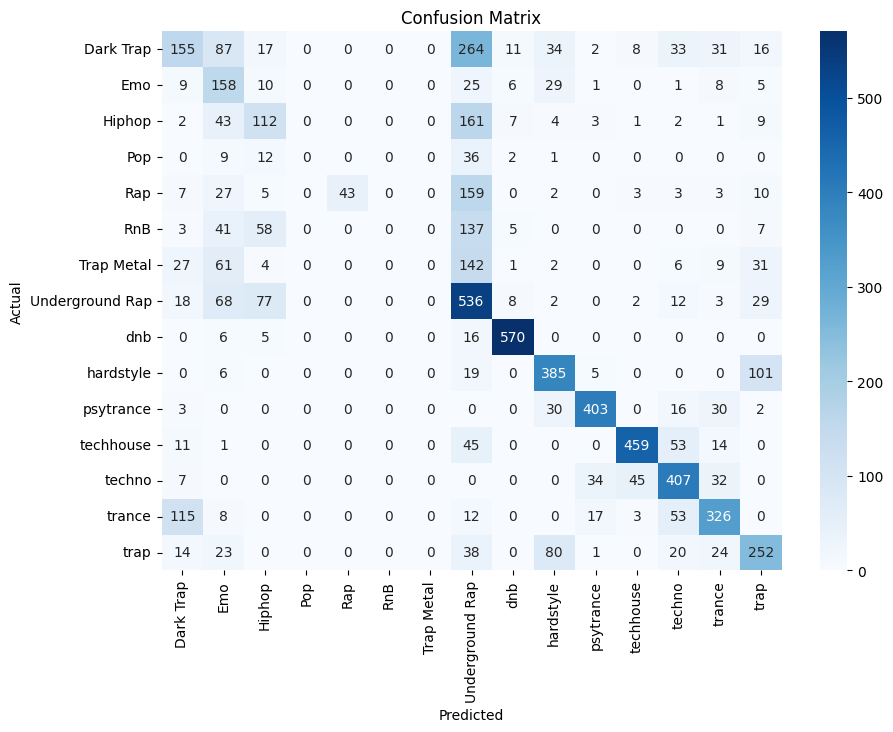

In [84]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier =  DecisionTreeClassifier()
hyper_params_grid = {
    'max_depth': [4, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [10, 20, 30]
}

print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(decision_tree_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Training accuracy: {best_model.score(X_train, y_train):.2f}" )

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [85]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "DecisionTreeClassifier",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## Random Forest Classifier

Tuning hyperparameters...
Training accuracy: 0.78
Test Accuracy: 0.70


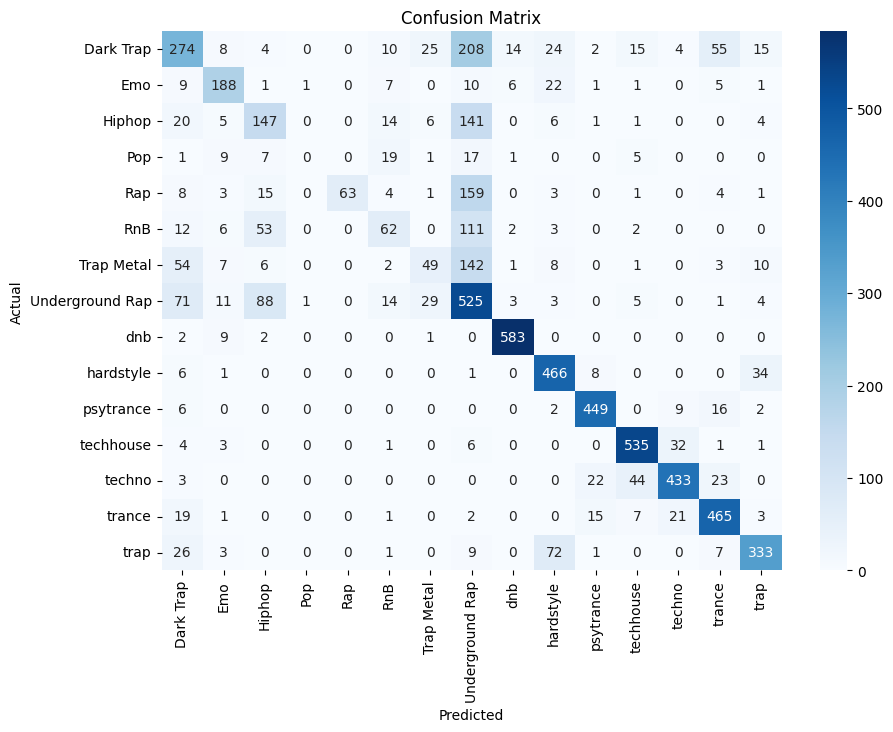

In [86]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier =  RandomForestClassifier()

hyper_params_grid = dict({'n_estimators': [100, 200, 300, 400], 'max_depth': [None, 10, 20, 30]})
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(random_forest_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Training accuracy: {best_model.score(X_train, y_train):.2f}" )


y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [87]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "RandomForestClassifier",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## SVM

Tuning hyperparameters...
Training accuracy: 0.75
Test Accuracy: 0.69


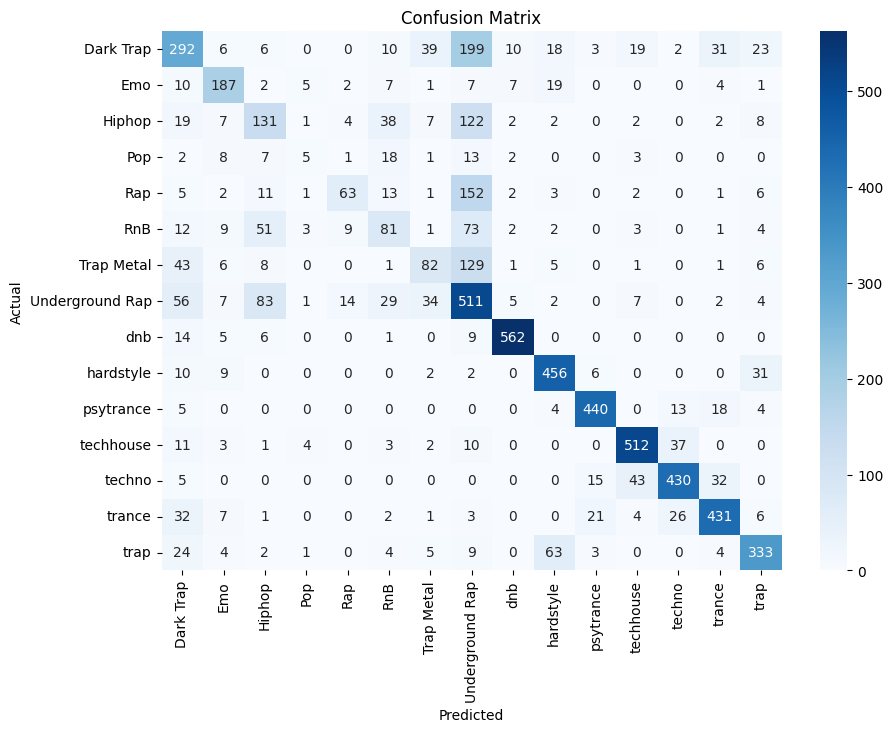

In [88]:
from sklearn.svm import SVC
svm_classifier =  SVC()

hyper_params_grid = dict({'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(svm_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Training accuracy: {best_model.score(X_train, y_train):.2f}" )


y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [89]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "SVM",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## KNeighbors

Tuning hyperparameters...
Training accuracy: 0.64
Test Accuracy: 0.60


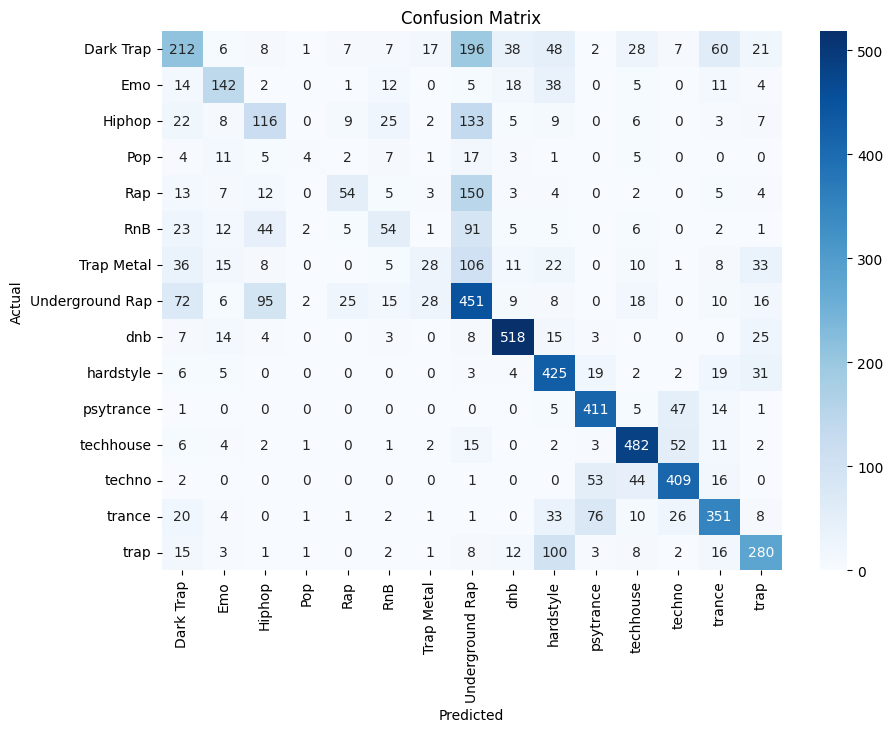

In [90]:
from sklearn.neighbors import KNeighborsClassifier

kneighbors_classifier =  KNeighborsClassifier()

hyper_params_grid = dict({'n_neighbors': np.arange(2, 30, 1)})
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(kneighbors_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Training accuracy: {best_model.score(X_train, y_train):.2f}" )


y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [91]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "KNeighborsClassifier",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## Naive Bayes

Tuning hyperparameters...
Training accuracy: 0.63
Test Accuracy: 0.63


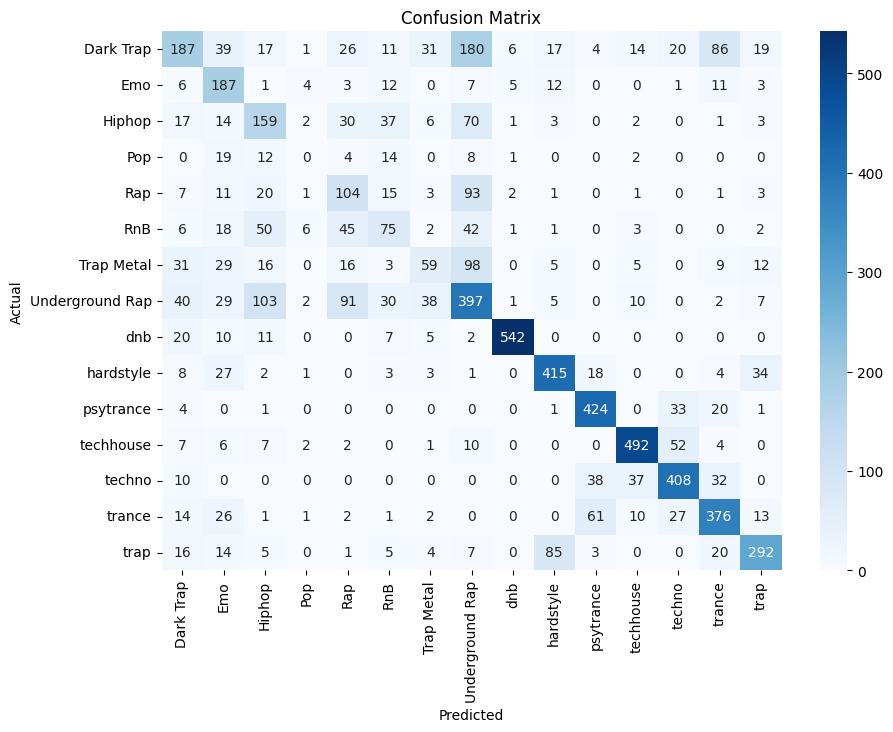

In [92]:

from sklearn.naive_bayes import GaussianNB

kneighbors_classifier =  GaussianNB()

hyper_params_grid = dict({'var_smoothing': np.logspace(0,-9, num=100)})

print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(kneighbors_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Training accuracy: {best_model.score(X_train, y_train):.2f}" )

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [93]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "GaussianNB",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## Multi-layer Perceptron (Neural Network)

Tuning hyperparameters...


/Users/mohamedlouaibouzaher/Desktop/UPC/ML/project/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohamedlouaibouzaher/Desktop/UPC/ML/project/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohamedlouaibouzaher/Desktop/UPC/ML/project/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohamedlouaibouzaher/Desktop/UPC/ML/project/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optim

Training accuracy: 0.75
Test Accuracy: 0.70


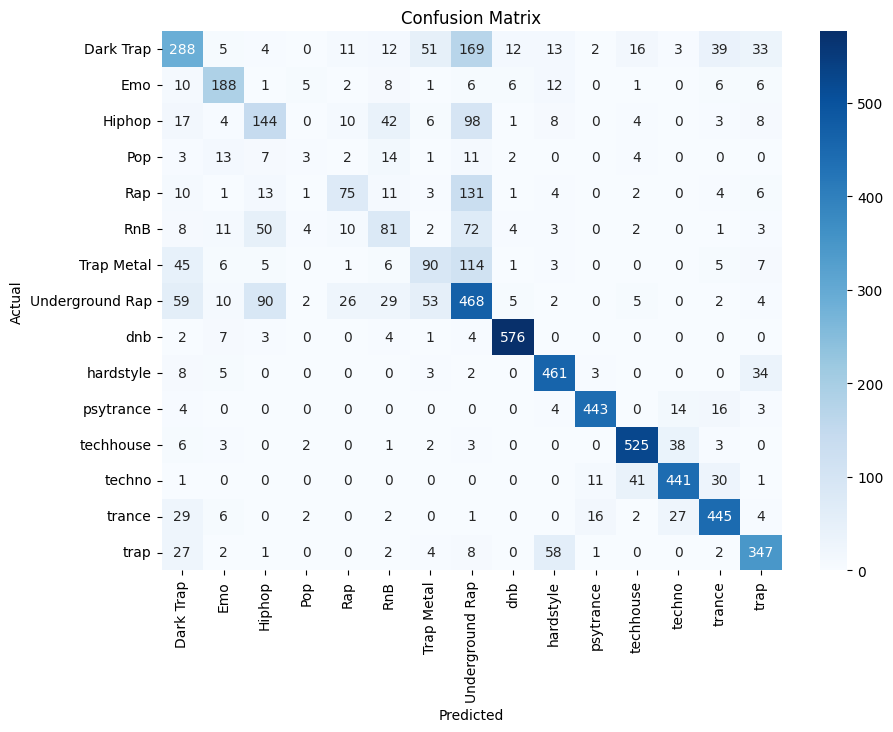

In [94]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(max_iter=1000)

hyper_params_grid = dict(
    {
        "hidden_layer_sizes": [
            (100,),
            (100, 100),
            (
                100,
                100,
                100,
            ),
        ],
        "activation": ["tanh", "relu"],
        "solver": ["sgd", "adam"],
        "alpha": [0.0001, 0.05],
        "learning_rate": ["constant", "adaptive"],
    }
)
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(
    mlp_classifier, hyper_params_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Training accuracy: {best_model.score(X_train, y_train):.2f}" )

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [95]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "MLP",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## Keras Sequential

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,663 (45.56 KB)

 Trainable params: 11,279 (44.06 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4066 - loss: 1.9887 - val_accuracy: 0.6263 - val_loss: 1.2125 - learning_rate: 0.0010
Epoch 2/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.5834 - loss: 1.3454 - val_accuracy: 0.6577 - val_loss: 1.0860 - learning_rate: 0.0010
Epoch 3/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.6161 - loss: 1.2186 - val_accuracy: 0.6635 - val_loss: 1.0383 - learning_rate: 0.0010
Epoch 4/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.6264 - loss: 1.1605 - val_accuracy: 0.6753 - val_loss: 1.0004 - learning_rate: 0.0010
Epoch 5/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.6404 - loss: 1.1209 - val_accuracy: 0.6791 - val_loss: 0.9682 - learning_rate: 0.0010
Epoch 6/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.6472 - loss: 1.0724 - val_accuracy: 0.6804 - val_loss: 0.9566 - learning_rate: 0.0010
Epoch 7/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.649

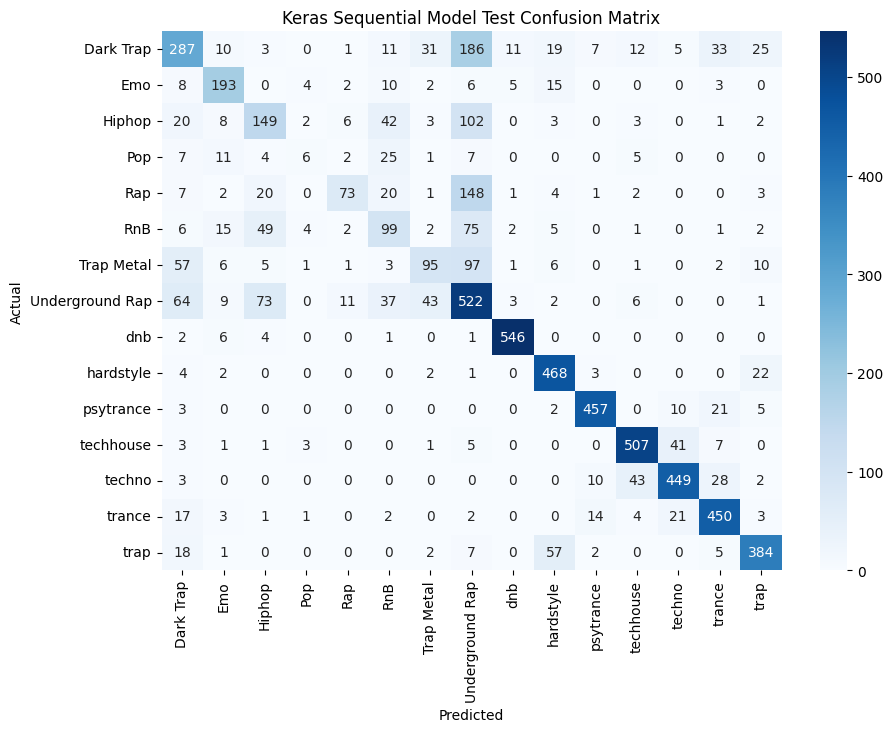

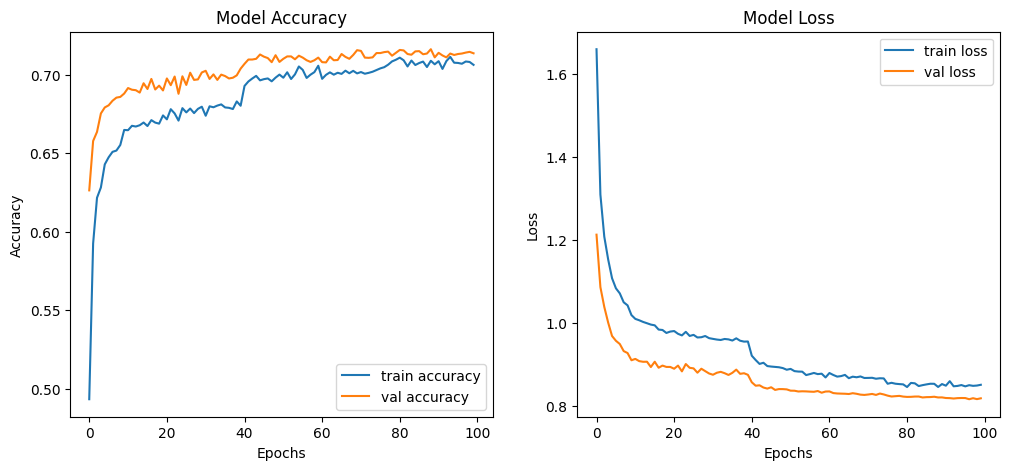

In [96]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


y_encoded = pd.get_dummies(y).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = keras.models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_actual = np.argmax(y_test, axis=1)
test_accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

cm_test = confusion_matrix(y_test_actual, y_test_pred)
cm_test_df = pd.DataFrame(cm_test, index=np.unique(y), columns=np.unique(y))

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_df, annot=True, fmt='d', cmap='Blues')
plt.title('Keras Sequential Model Test Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [104]:
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_actual = np.argmax(y_test, axis=1)
test_accuracy = accuracy_score(y_test_actual, y_test_pred)
test_f1 = f1_score(y_test_actual, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "Keras Sequential",
        "model": model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)


205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


## Comparing Models Performance


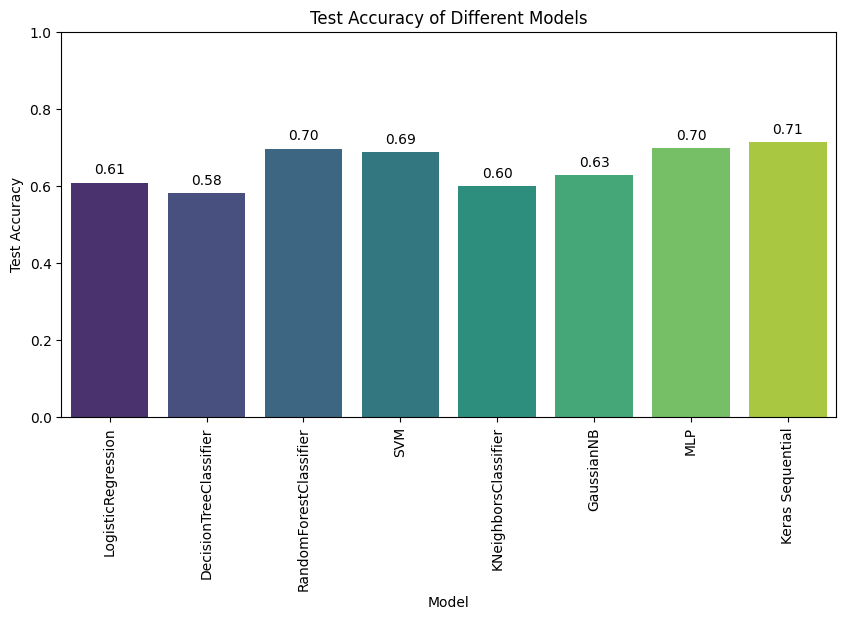

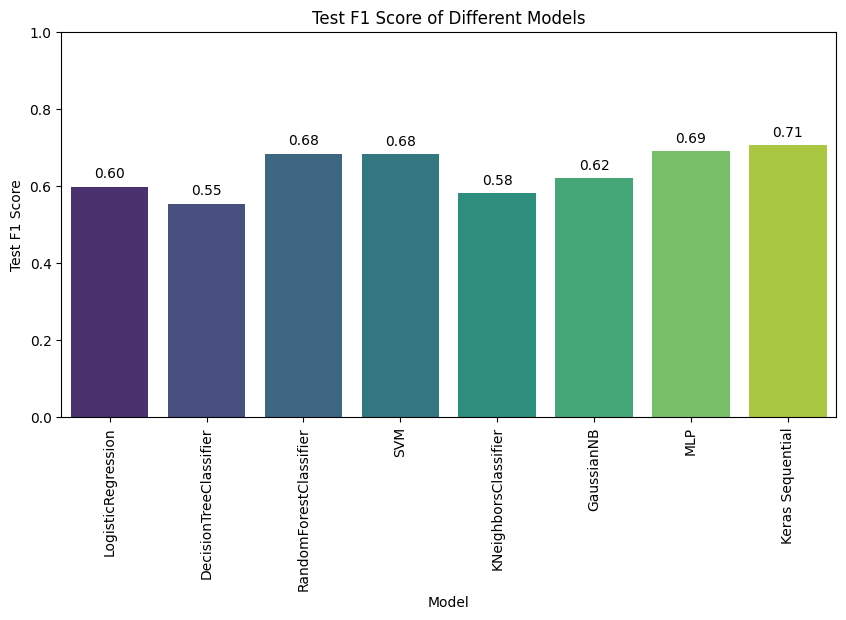

In [108]:
df_performance = pd.DataFrame(models_performance)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='type', y='test_accuracy', hue='type', data=df_performance, palette='viridis', legend=False)
plt.title('Test Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)  
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 5))
ax =sns.barplot(x='type', y='test_f1',hue='type', data=df_performance, palette='viridis', legend=False)
plt.title('Test F1 Score of Different Models')
plt.xlabel('Model')
plt.ylabel('Test F1 Score')
plt.ylim(0, 1)  
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()



### Observations 

- This analysis shows how many song genres were closely related according to the features which makes the classification task difficult even after data preprocessing and models hyper-parameters tuning. 

- For example, most classifiers confuse 'Underground Rap' with 'Dark Trap' which goes back to the similarities in their features.

- CNN shows the best performance compared to other models with an accuracy score of `0.71` and F1 Score of `0.71`. MLP and Random Forest Classifier come second with a close accuracy score of `0.70` and F1 Score of `0.69` and `0.68` respectively